# <center>PROYECTO INTELIGENCIA ARTIFICIAL </center>

# ANALISIS DE SUICIDIOS A NIVEL MUNDIAL

<img src="12.jpg" style="width:700px;">


## INTEGRANTES

**DANIELA QUINTERO LEON - 2161635**

**MARTHA ELIANA ARENAS MARQUEZ - 2162042**

**CARLOS DANIEL BARRERA MANRIQUE - 2162061**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
pd.__version__

u'0.22.0'

In [2]:
d= pd.read_csv("master.csv")
d.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [3]:
d["generation"].unique()

array(['Generation X', 'Silent', 'G.I. Generation', 'Boomers',
       'Millenials', 'Generation Z'], dtype=object)

In [4]:
d.generation = d.generation.replace({"Generation X": 0, "Silent": 1, "Boomers": 2, "Millenials": 3, "Generation Z": 4, "G.I. Generation": 5})
    

In [5]:
d.sex=d.sex.replace({"male":0, "female": 1})

In [6]:
d[12]=d.values[:,3]
names = d.columns.tolist()
names[names.index(12)] = 'agefin'
d.columns = names

In [7]:
d.age=d.age.replace({"15-24 years":15 , "35-54 years":35 ,"75+ years":75 ,"25-34 years":25 ,"55-74 years":55 ,"5-14 years":5})

In [8]:
d.agefin=d.agefin.replace({"15-24 years":24 , "35-54 years":54 ,"75+ years":100 ,"25-34 years":34 ,"55-74 years":74 ,"5-14 years":14})

In [9]:
d[" gdp_for_year ($) "].unique()

array(['2,156,624,900', '2,126,000,000', '2,335,124,988', ...,
       '51,821,573,338', '57,690,453,461', '63,067,077,179'], dtype=object)

In [10]:
names = d.columns.tolist()
names[names.index(' gdp_for_year ($) ')] = 'gdp_for_year'
names[names.index('gdp_per_capita ($)')] = 'gdp_per_capita'
names[names.index('suicides/100k pop')] = 'suicides_100'
names[names.index('country-year')] = 'countryear'
d.columns = names

In [11]:
d[13]=d.values[:,0]
names = d.columns.tolist()
names[names.index(13)] = 'codcountry'
d.columns = names

In [12]:
d.codcountry=d.codcountry.replace({'Albania':0,'Antigua and Barbuda':1,'Argentina':2, 'Armenia':3, 'Aruba':4,
       'Australia':5, 'Austria':6, 'Azerbaijan':7, 'Bahamas':8, 'Bahrain':9,
       'Barbados':10, 'Belarus':11, 'Belgium':12, 'Belize':13,
       'Bosnia and Herzegovina':14, 'Brazil':15, 'Bulgaria':16, 'Cabo Verde':17,
       'Canada':18, 'Chile':19, 'Colombia':20, 'Costa Rica':21, 'Croatia':22, 'Cuba':23,
       'Cyprus':24, 'Czech Republic':25, 'Denmark':26, 'Dominica':27, 'Ecuador':28,
       'El Salvador':29, 'Estonia':30, 'Fiji':31, 'Finland':32, 'France':33, 'Georgia':34,
       'Germany':35, 'Greece':36, 'Grenada':37, 'Guatemala':38, 'Guyana':39, 'Hungary':40,
       'Iceland':41, 'Ireland':42, 'Israel':43, 'Italy':44, 'Jamaica':45, 'Japan':46,
       'Kazakhstan':47, 'Kiribati':48, 'Kuwait':49, 'Kyrgyzstan':50, 'Latvia':51,
       'Lithuania':52, 'Luxembourg':53, 'Macau':54, 'Maldives':55, 'Malta':56,
       'Mauritius':57, 'Mexico':58, 'Mongolia':59, 'Montenegro':60, 'Netherlands':61,
       'New Zealand':62, 'Nicaragua':63, 'Norway':64, 'Oman':65, 'Panama':66, 'Paraguay':67,
       'Philippines':68, 'Poland':69, 'Portugal':70, 'Puerto Rico':71, 'Qatar':72,
       'Republic of Korea':73, 'Romania':74, 'Russian Federation':75,
       'Saint Kitts and Nevis':76, 'Saint Lucia':77,
       'Saint Vincent and Grenadines':78, 'San Marino':79, 'Serbia':80,
       'Seychelles':81, 'Singapore':82, 'Slovakia':83, 'Slovenia':84, 'South Africa':85,
       'Spain':86, 'Sri Lanka':87, 'Suriname':88, 'Sweden':89, 'Switzerland':90,
       'Thailand':91, 'Trinidad and Tobago':92, 'Turkey':93, 'Turkmenistan':94,
       'Ukraine':95, 'United Arab Emirates':96, 'United Kingdom':97,
       'United States':98, 'Uruguay':99, 'Uzbekistan':100 })

In [13]:
f=d[d["codcountry"]==69]


In [14]:
d.drop(['HDI for year'], axis='columns', inplace=True)

In [15]:
d= d[['codcountry','year', 'country','sex','age','agefin','suicides_no','population','suicides_100','countryear','gdp_for_year','gdp_per_capita','generation']]


In [16]:
d["countryear"] = d.apply(lambda x: "".join([str(x[i]) for i in range(2)]),axis=1) 

In [17]:
d.head()

,codcountry,year,country,sex,age,agefin,suicides_no,population,suicides_100,countryear,gdp_for_year,gdp_per_capita,generation
0,0,1987,Albania,0,15,24,21,312900,6.71,01987,"2,156,624,900",796,0
1,0,1987,Albania,0,35,54,16,308000,5.19,01987,"2,156,624,900",796,1
2,0,1987,Albania,1,15,24,14,289700,4.83,01987,"2,156,624,900",796,0
3,0,1987,Albania,0,75,100,1,21800,4.59,01987,"2,156,624,900",796,5
4,0,1987,Albania,0,25,34,9,274300,3.28,01987,"2,156,624,900",796,2


In [18]:
d['year']=d['year'].astype(np.float64)
d['sex']=d['sex'].astype(np.float64)
d['codcountry']=d['codcountry'].astype(np.float64)
d['age']=d['age'].astype(np.float64)
d['suicides_no']=d['suicides_no'].astype(np.float64)
d['population']=d['population'].astype(np.float64)
d['agefin']=d['agefin'].astype(np.float64)
d['generation']=d['generation'].astype(np.float64)
d['gdp_per_capita']=d['gdp_per_capita'].astype(np.float64)
d['countryear']=d['countryear'].astype(np.float64)
d['suicides_100']=d['suicides_100'].astype(np.float64)

In [19]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 13 columns):
codcountry        27820 non-null float64
year              27820 non-null float64
country           27820 non-null object
sex               27820 non-null float64
age               27820 non-null float64
agefin            27820 non-null float64
suicides_no       27820 non-null float64
population        27820 non-null float64
suicides_100      27820 non-null float64
countryear        27820 non-null float64
gdp_for_year      27820 non-null object
gdp_per_capita    27820 non-null float64
generation        27820 non-null float64
dtypes: float64(11), object(2)
memory usage: 2.8+ MB


In [20]:
X=d.values[:,(4,5)]
m=X.mean(axis=1)
d['age'] = m
d.drop(['agefin'], axis='columns', inplace=True)


In [26]:
d.head()

,codcountry,year,country,sex,age,suicides_no,population,suicides_100,countryear,gdp_for_year,gdp_per_capita,generation
0,0.0,1987.0,Albania,0.0,19.5,21.0,312900.0,6.71,1987.0,"2,156,624,900",796.0,0.0
1,0.0,1987.0,Albania,0.0,44.5,16.0,308000.0,5.19,1987.0,"2,156,624,900",796.0,1.0
2,0.0,1987.0,Albania,1.0,19.5,14.0,289700.0,4.83,1987.0,"2,156,624,900",796.0,0.0
3,0.0,1987.0,Albania,0.0,87.5,1.0,21800.0,4.59,1987.0,"2,156,624,900",796.0,5.0
4,0.0,1987.0,Albania,0.0,29.5,9.0,274300.0,3.28,1987.0,"2,156,624,900",796.0,2.0


In [27]:
d.shape

(27820, 12)

## Caracteristicas Generales

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3fb6bf3c10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f3fa7cc6250>]], dtype=object)

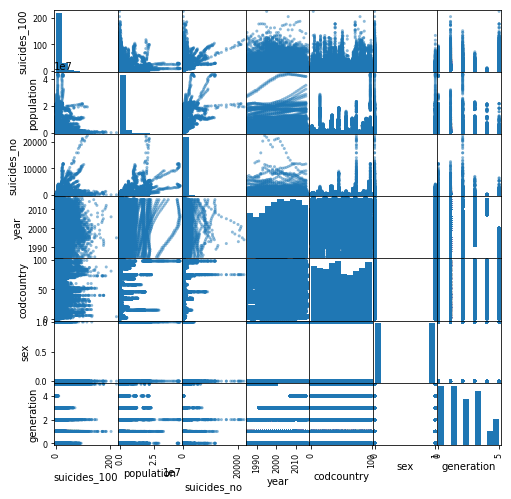

In [28]:
attributes = ["suicides_100", "population", "suicides_no","year","codcountry", "sex", "age","generation"]
pd.plotting.scatter_matrix(d[attributes], figsize=(8,8))

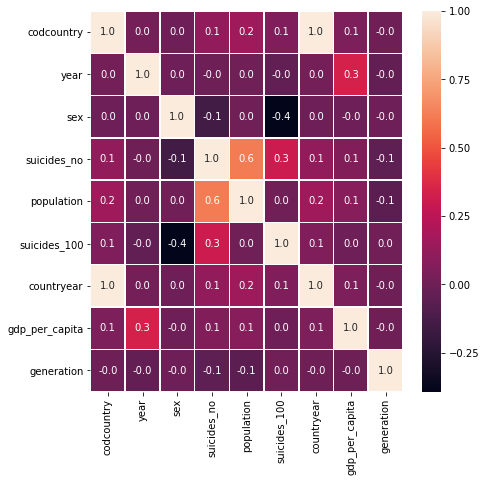

In [29]:
f, ax = plt.subplots(figsize=(7,7))
import seaborn as sns
sns.heatmap(d.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3fa50c1110>]], dtype=object)

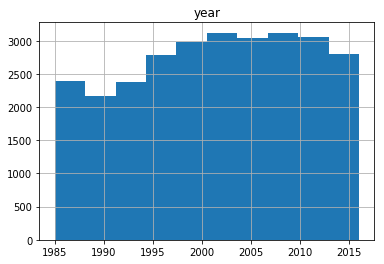

In [30]:
d.hist('year')

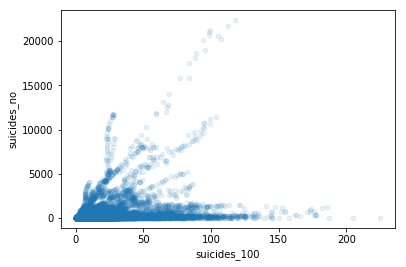

In [31]:
d.plot(kind="scatter", x="suicides_100", y="suicides_no", alpha=0.1)

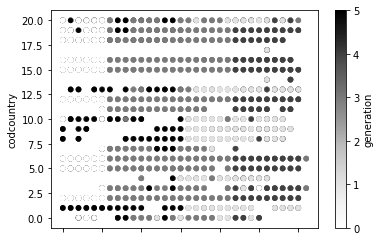

In [32]:
f=d[0:6000]
f.plot.scatter(x='year', y='codcountry', c='generation');

## Analisis de datos segun el numero de suicidios

In [33]:
! pip install seaborn

You are using pip version 9.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


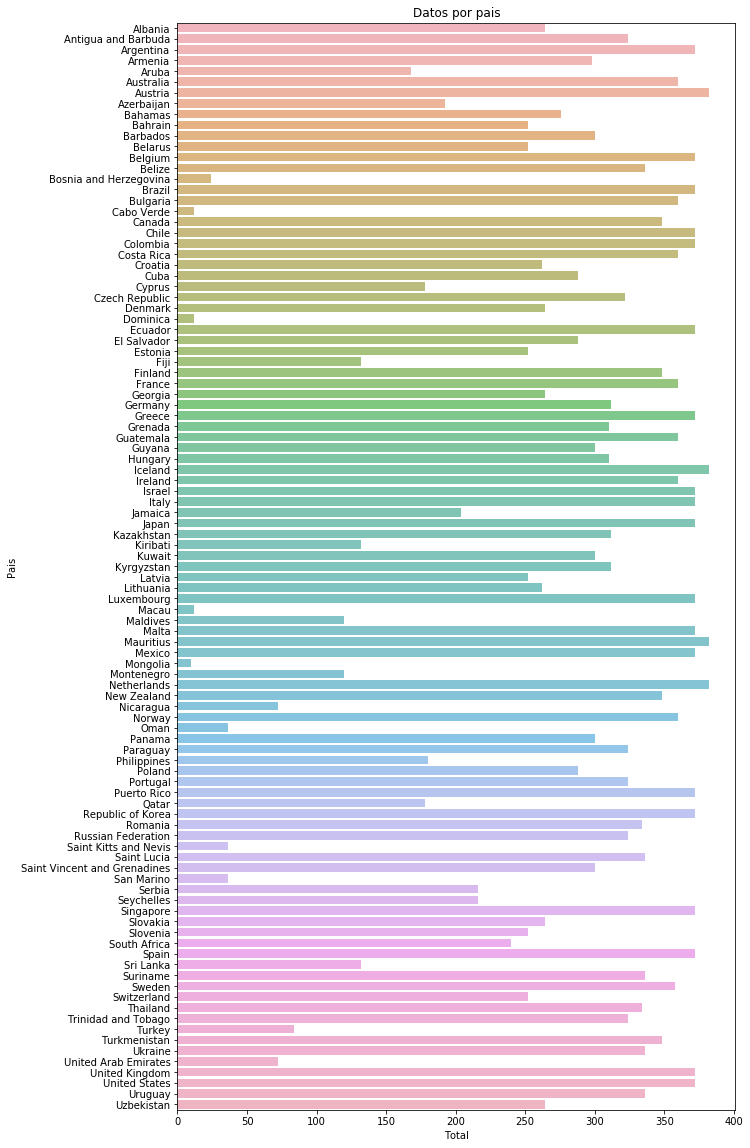

In [34]:
import seaborn as sns
alpha = 0.7
plt.figure(figsize=(10,20))
sns.countplot(y='country', data=d, alpha=alpha)
plt.title('Datos por pais')
plt.ylabel('Pais')
plt.xlabel('Total')
plt.show()

## Numero de siucidios de acuerdo al pais

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51]), <a list of 52 Text xticklabel objects>)

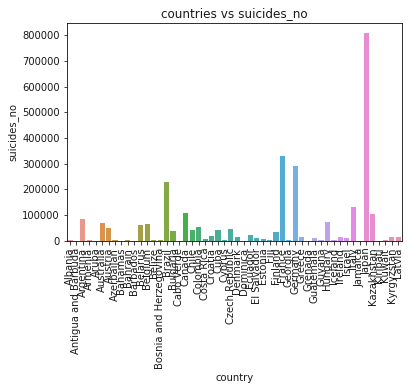

In [35]:
country_suicides = d[['country','suicides_no']].groupby(['country']).sum()
country_suicides = country_suicides.reset_index()
top52 = country_suicides[:52]
sns.barplot(x='country', y='suicides_no', data=top52).set_title('countries vs suicides_no')
sns.set(rc={'figure.figsize':(18,8)})
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]),
 <a list of 49 Text xticklabel objects>)

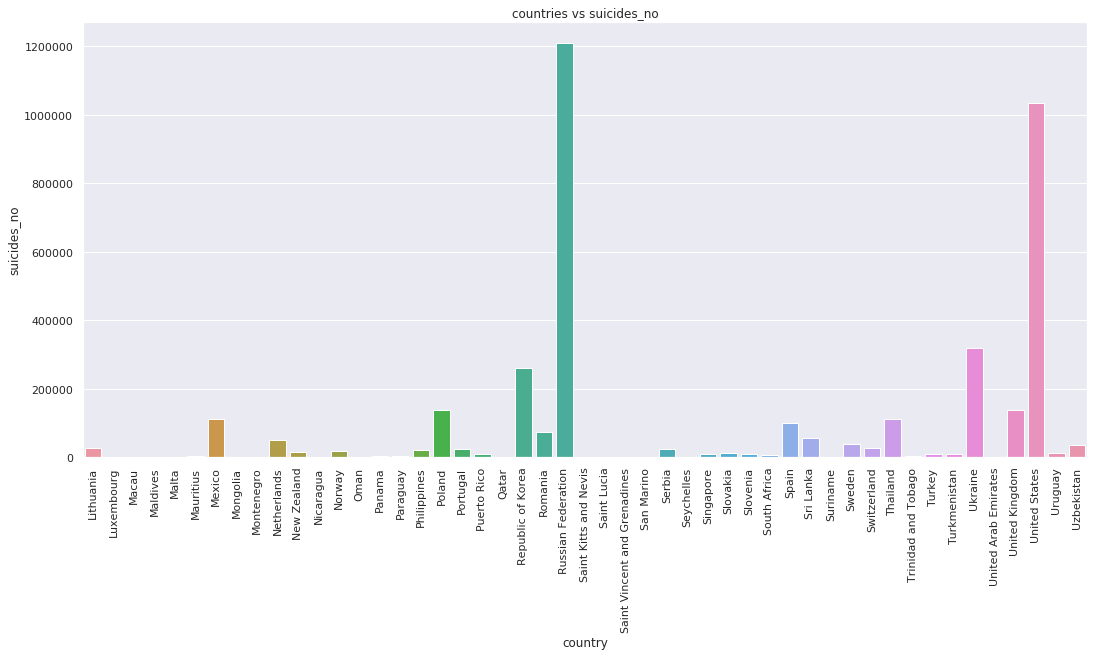

In [36]:
top53 = country_suicides[52:]
sns.barplot(x='country', y='suicides_no', data=top53).set_title('countries vs suicides_no')
sns.set(rc={'figure.figsize':(12,6)})
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

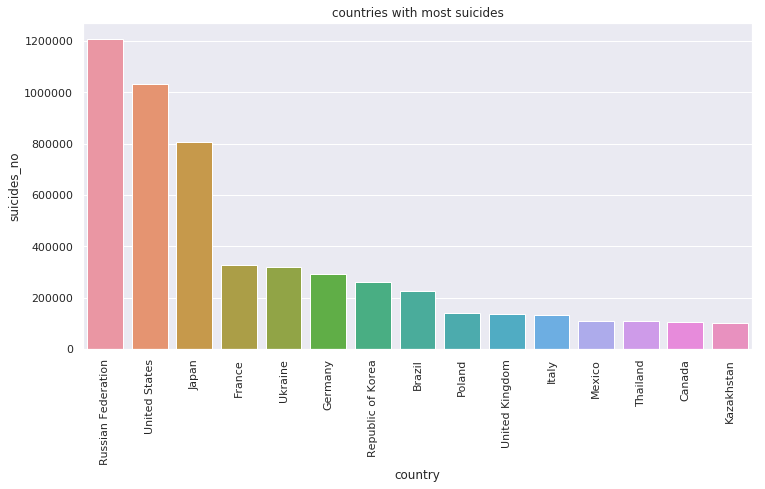

In [37]:
country_suicides = country_suicides.reset_index().sort_values(by='suicides_no', ascending=False)
top15 = country_suicides[:15]
sns.barplot(x='country', y='suicides_no', data=top15).set_title('countries with most suicides')
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

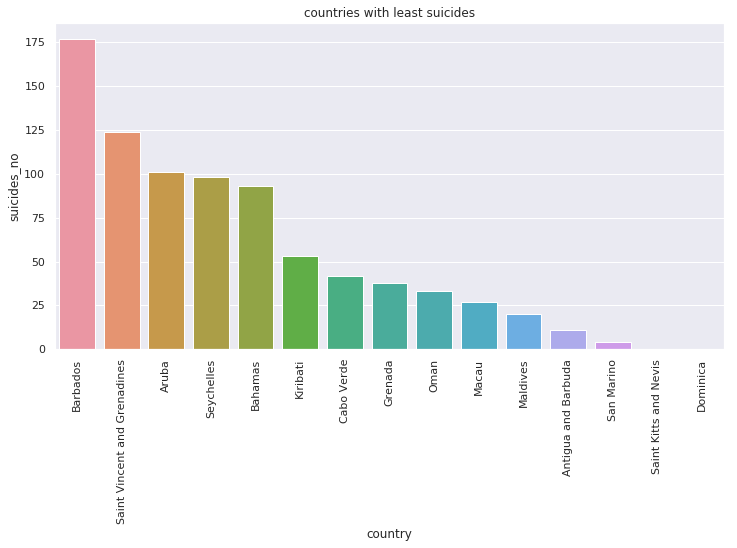

In [38]:
bottom15 = country_suicides[-15:]
sns.barplot(x='country', y='suicides_no', data=bottom15).set_title('countries with least suicides')
plt.xticks(rotation=90)

## Analizando caracterisrticas de acuerdo a la generacion

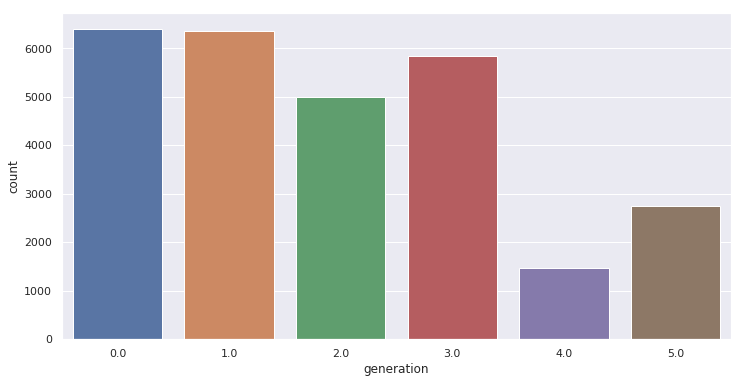

In [39]:
grid = sns.countplot(x='generation', data=d)
grid = plt.setp(grid.get_xticklabels(), rotation=360)

Text(0.5,1,u'Suicides vs generations per year')

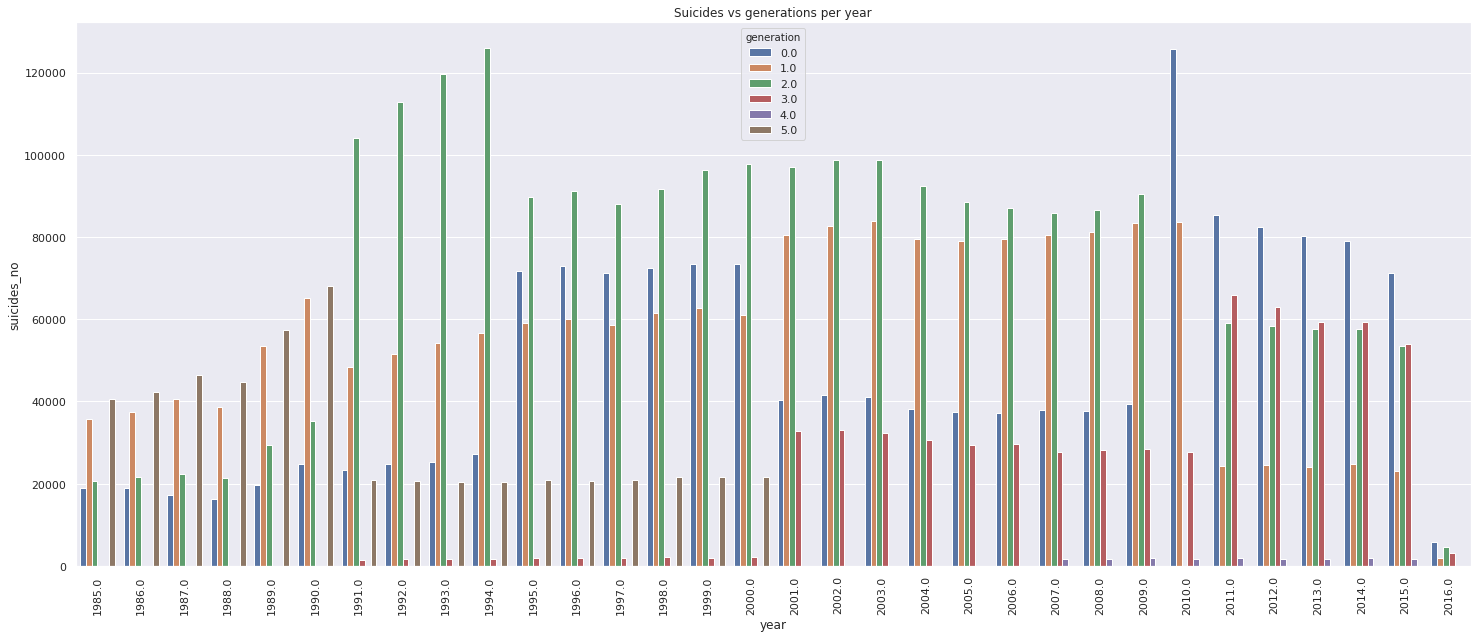

In [40]:
gen_year = d[['suicides_no','generation','year']].groupby(['generation','year']).sum().reset_index()
plt.figure(figsize=(25,10))
sns.set(font_scale=1.5)
sns.set(rc={'figure.figsize':(4,3)})
plt.xticks(rotation=90)
sns.barplot(y='suicides_no', x='year', hue='generation', data=gen_year, palette='deep').set_title('Suicides vs generations per year')

In [41]:
X = d.values[:,[0,6,1,3,4,5,7,8,10]]
y = d.values[:,11]

o
D
*


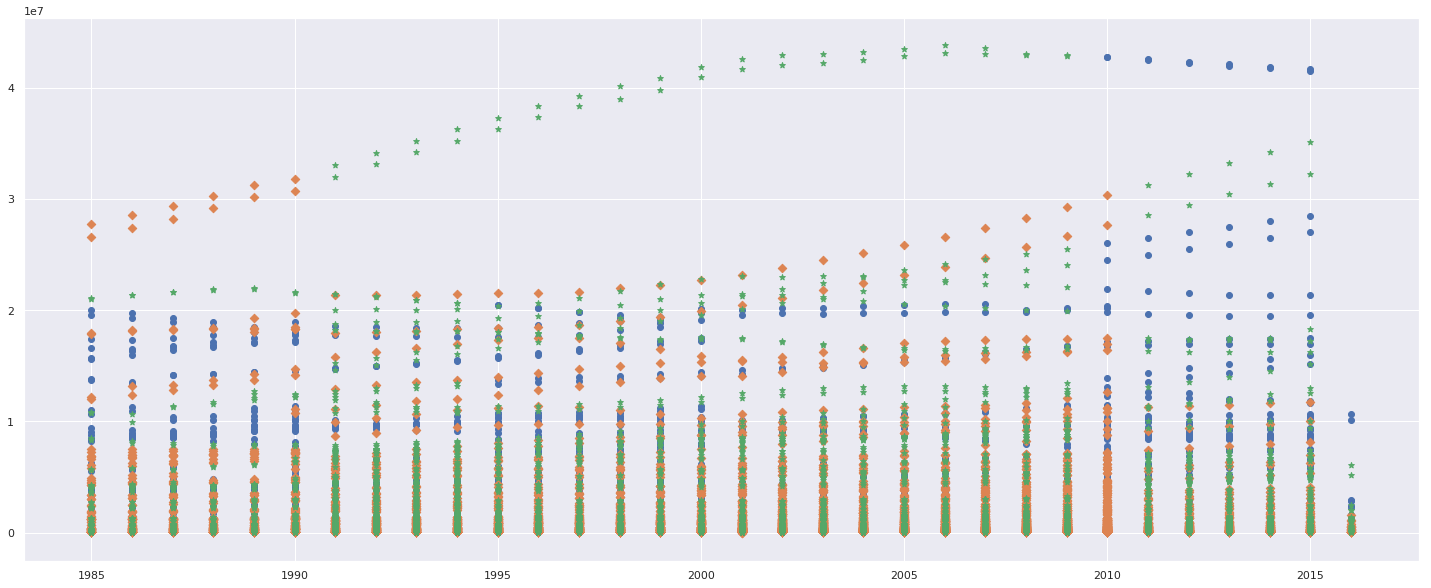

In [42]:
from matplotlib import pyplot as plt
plt.figure(figsize=(25,10))
plt.clf()
for tipo,marca in zip(range(3),"oD*"):
        print marca
        plt.scatter(X[:,2][y == tipo], 
                    X[:,1][y == tipo], 
                    marker=marca)
plt.show()

p
D
<


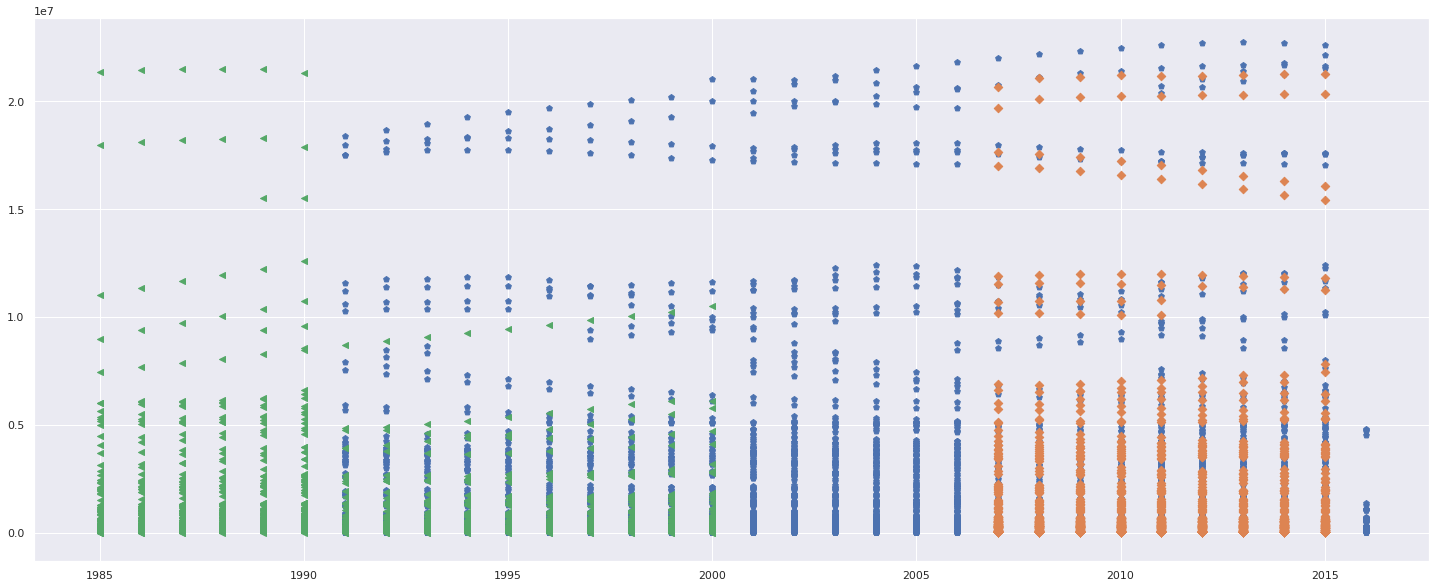

In [43]:
from matplotlib import pyplot as plt
plt.figure(figsize=(25,10))
plt.clf()
for tipo,marca in zip(range(3,7),"pD<"):
        print marca
        plt.scatter(X[:,2][y == tipo], 
                    X[:,1][y == tipo], 
                    marker=marca)
plt.show()

## ANALISIS POR GENERO

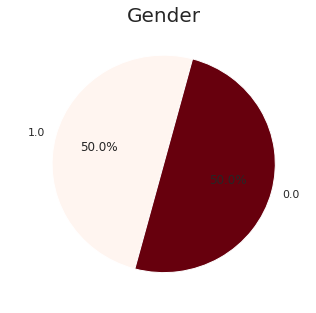

In [44]:
color = plt.cm.Reds(np.linspace(0, 1, 2))
d['sex'].value_counts().plot.pie(colors = color, figsize = (5, 5), startangle = 75, autopct='%1.1f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')
plt.show()

Text(0.5,1,u'Suicides vs generations per year')

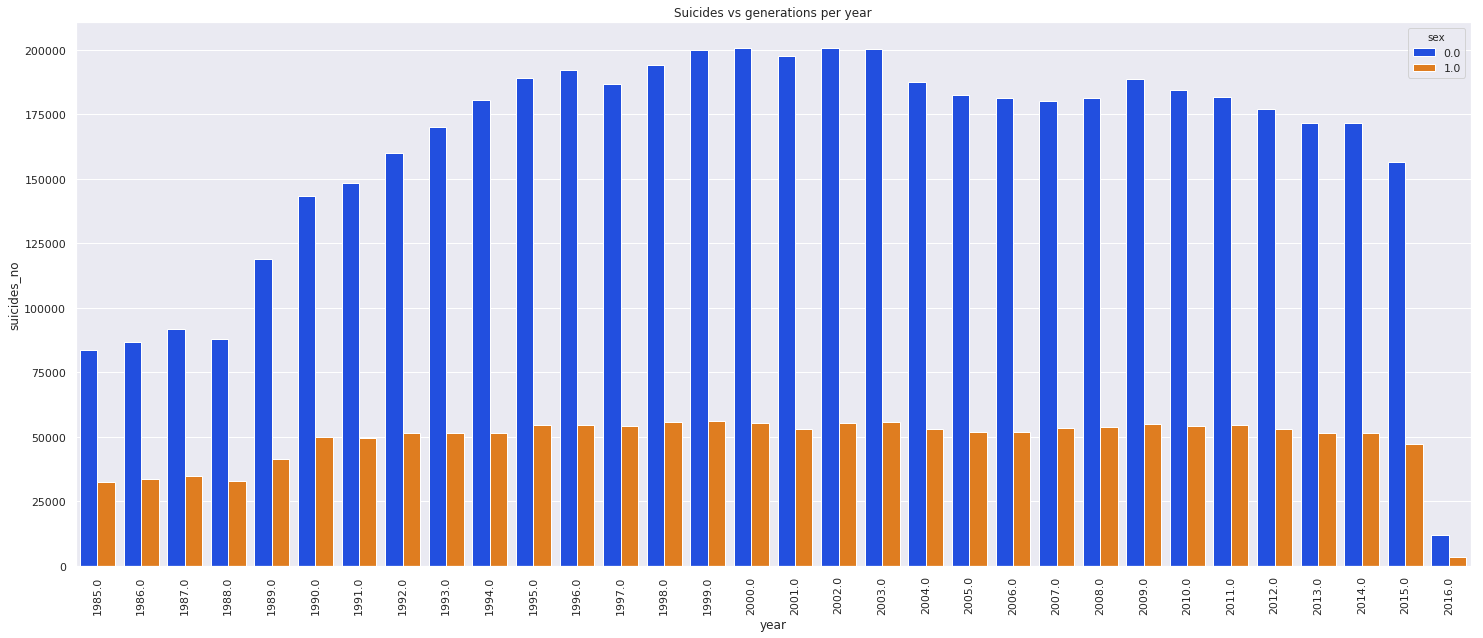

In [45]:
gen_year = d[['suicides_no','sex','year']].groupby(['sex','year']).sum().reset_index()
plt.figure(figsize=(25,10))
sns.set(font_scale=1.5)
sns.set(rc={'figure.figsize':(4,3)})
plt.xticks(rotation=90)
sns.barplot(y='suicides_no', x='year', hue='sex', data=gen_year, palette='bright').set_title('Suicides vs generations per year')

# <center> Metodos de Clasificacion</center>

## ¿Que tipo de gente se esta suicidando?

**<center>TOMANDO Y COMO EL CODIGO DEL PAIS</center>**

**En que paises es mayor la tasa de suicidios**

## Metodo de Bayes

In [46]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import *

In [47]:
from sklearn.naive_bayes import GaussianNB
X = d.values[:,[1,3,4,5,6,7,10,11]]
y = d.values[:,0]
y=y.astype('int')
est = GaussianNB()

In [48]:
s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print "accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s))

accuracy 0.245 (+/- 0.00616)


In [49]:
from sklearn.model_selection import train_test_split
Xtr, Xts, ytr, yts = train_test_split(X,y, test_size=.2)
est.fit(Xtr,ytr)
print est.score(Xts,yts)

0.246046010065


Text(0.5,1,u'showing only some random 40 test elements (BLACK line is error)')

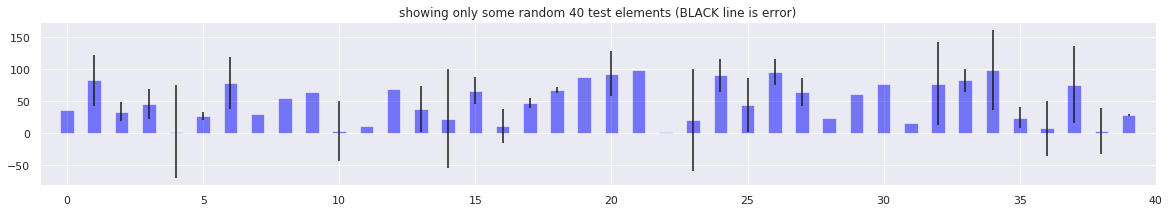

In [50]:
plt.figure(figsize=(20,3))
preds = est.predict(Xts)
errs  = np.abs(yts - preds)
perm = np.random.permutation(range(len(yts)))[:40]
plt.bar(range(len(perm)), yts[perm], 0.5, yerr = errs[perm], color="blue", alpha=.5)
plt.xlim(-1,len(perm))
plt.title("showing only some random %d test elements (BLACK line is error)"%len(perm))

In [51]:
def show_curve(est):
    means, stds = [], []
    nfolds_range = range(2,11)
    for nfolds in nfolds_range:
        print nfolds,
        s = cross_val_score(est, X, y, cv=KFold(nfolds, shuffle=True), scoring=make_scorer(mean_squared_error))
        means.append(np.mean(s))
        stds.append(np.std(s))

    means = np.r_[means]
    stds  = np.r_[stds]

    plt.plot(nfolds_range, means, label="mean", color="black")
    plt.fill_between(nfolds_range, means-stds, means+stds, color="blue", alpha=.5, label="std")
    plt.xlabel("n folds")
    plt.ylabel("performance")
    plt.legend()

2 3 4 5 6 7 8 9 10


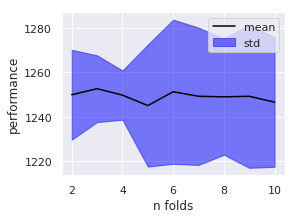

In [52]:
show_curve(GaussianNB())

In [53]:
s = cross_val_score(est, X, y, cv=KFold(4, shuffle=True), scoring=make_scorer(accuracy_score))
print "accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s))

accuracy 0.243 (+/- 0.00324)


## Metodo RandomForestClassifier

In [54]:
from sklearn.ensemble import RandomForestClassifier
estC = RandomForestClassifier()
sC = cross_val_score(estC, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print "accuracy %.3f (+/- %.5f)"%(np.mean(sC), np.std(sC))

accuracy 0.864 (+/- 0.00936)


In [55]:
def tpr(estC,X,y):
    p = estC.predict(X)
    return np.mean (p[y==1] == y[y==1])

def tnr(estC,X,y):
    p = estC.predict(X)
    return np.mean(p[y==0] == y[y==0])

In [56]:
st = cross_val_score(estC, X, y, cv=KFold(7, shuffle=True), scoring=tpr)
print "tpr      %.3f (+/- %.5f)"%(np.mean(st), np.std(st))
sn = cross_val_score(estC, X, y, cv=KFold(7, shuffle=True), scoring=tnr)
print "tnr      %.3f (+/- %.5f)"%(np.mean(sn), np.std(sn))

tpr      0.942 (+/- 0.02315)
tnr      0.696 (+/- 0.04826)


In [57]:
Xtr, Xts, ytr, yts = train_test_split(X,y, test_size=.2)
estC.fit(Xtr,ytr)
print estC.score(Xts,yts)

0.861610352265


Text(0.5,1,u'showing only some random 40 test elements (BLACK line is error)')

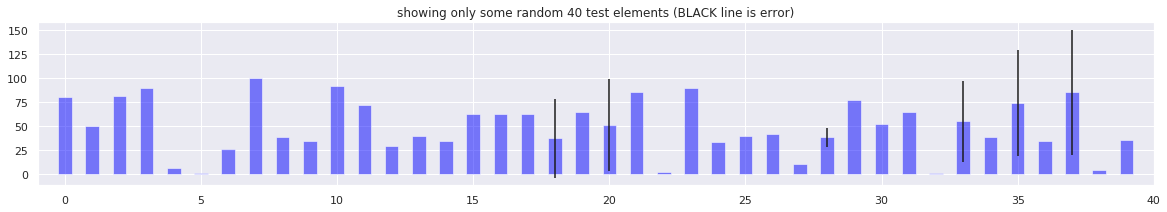

In [58]:
plt.figure(figsize=(20,3))
preds = estC.predict(Xts)
errs  = np.abs(yts - preds)
perm = np.random.permutation(range(len(yts)))[:40]
plt.bar(range(len(perm)), yts[perm], 0.5, yerr = errs[perm], color="blue", alpha=.5)
plt.xlim(-1,len(perm))
plt.title("showing only some random %d test elements (BLACK line is error)"%len(perm))

2 3 4 5 6 7 8 9 10


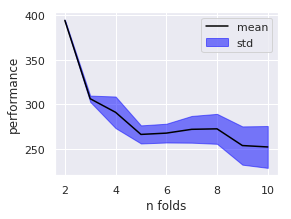

In [59]:
show_curve(RandomForestClassifier())

In [60]:
sC = cross_val_score(estC, X, y, cv=KFold(4, shuffle=True), scoring=make_scorer(accuracy_score))
print "accuracy %.3f (+/- %.5f)"%(np.mean(sC), np.std(sC))

accuracy 0.837 (+/- 0.00583)


## Metodo de decisionTreeClassifier

In [61]:
from sklearn.tree import DecisionTreeClassifier
est = DecisionTreeClassifier()
s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print "accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s))
s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=tpr)
print "tpr      %.3f (+/- %.5f)"%(np.mean(s), np.std(s))
s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=tnr)
print "tnr      %.3f (+/- %.5f)"%(np.mean(s), np.std(s))

accuracy 0.877 (+/- 0.00601)
tpr      0.977 (+/- 0.02795)
tnr      0.834 (+/- 0.06009)


In [62]:
Xtr, Xts, ytr, yts = train_test_split(X,y, test_size=.2)
est.fit(Xtr,ytr)
print est.score(Xts,yts)

0.864485981308


Text(0.5,1,u'showing only some random 40 test elements (BLACK line is error)')

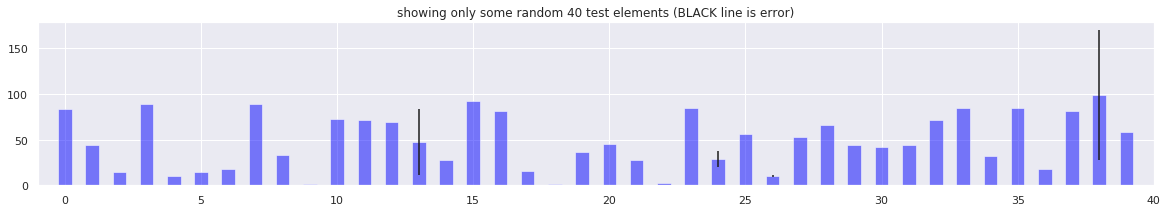

In [63]:
plt.figure(figsize=(20,3))
preds = est.predict(Xts)
errs  = np.abs(yts - preds)
perm = np.random.permutation(range(len(yts)))[:40]
plt.bar(range(len(perm)), yts[perm], 0.5, yerr = errs[perm], color="blue", alpha=.5)
plt.xlim(-1,len(perm))
plt.title("showing only some random %d test elements (BLACK line is error)"%len(perm))

2 3 4 5 6 7 8 9 10


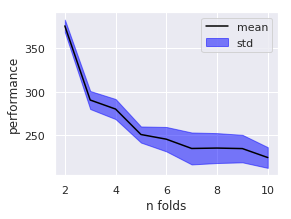

In [64]:
show_curve(DecisionTreeClassifier())

In [65]:
s = cross_val_score(est, X, y, cv=KFold(5, shuffle=True), scoring=make_scorer(accuracy_score))
print "accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s))

accuracy 0.863 (+/- 0.00171)


## Probando diferentes metodos de sklearn

In [70]:
from sklearn.linear_model import SGDClassifier
X = d.values[:,[1,3,4,5,6,7,10,11]]
y = d.values[:,0]
y=y.astype('int')
clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)  
s = cross_val_score(clf, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print "accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s))

accuracy 0.012 (+/- 0.00577)


In [73]:
from sklearn.tree import ExtraTreeClassifier
clf = ExtraTreeClassifier()  
s = cross_val_score(clf, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print "accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s))

accuracy 0.600 (+/- 0.02721)


In [74]:
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier() 
s = cross_val_score(clf, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print "accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s))

accuracy 0.845 (+/- 0.00894)


In [75]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier() 
s = cross_val_score(clf, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print "accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s))

accuracy 0.332 (+/- 0.00623)


In [76]:
from sklearn.linear_model import RidgeClassifier
clf = RidgeClassifier() 
s = cross_val_score(clf, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print "accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s))

accuracy 0.061 (+/- 0.00518)


In [77]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25)
from sklearn.preprocessing import StandardScaler
normalizador = StandardScaler().fit(X_train)
Xn_train = normalizador.transform(X_train)
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(Xn_train,y_train)
Xn_test = normalizador.transform(X_test)
knn.predict(Xn_test)
knn.score(Xn_test,y_test)

/opt/miniconda/lib/python2.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


0.35240833932422716

## Metodo Extra Tress Classifier

In [139]:
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier() 
s = cross_val_score(clf, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print "accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s))
s = cross_val_score(clf, X, y, cv=KFold(10, shuffle=True), scoring=tpr)
print "tpr      %.3f (+/- %.5f)"%(np.mean(s), np.std(s))
s = cross_val_score(clf, X, y, cv=KFold(10, shuffle=True), scoring=tnr)
print "tnr      %.3f (+/- %.5f)"%(np.mean(s), np.std(s))

accuracy 0.915 (+/- 0.00896)
tpr      0.965 (+/- 0.03680)
tnr      0.847 (+/- 0.05812)


In [140]:
from sklearn.model_selection import train_test_split
Xtr, Xts, ytr, yts = train_test_split(X,y, test_size=.2)
clf.fit(Xtr,ytr)
print clf.score(Xts,yts)

0.8995327102803738


In [141]:
print "TRAIN accuracy %.3f"%clf.score(Xtr, ytr)
print "TEST  accuracy %.3f"%clf.score(Xts, yts)

TRAIN accuracy 1.000
TEST  accuracy 0.900


Text(0.5,1,'showing only some random 40 test elements (BLACK line is error)')

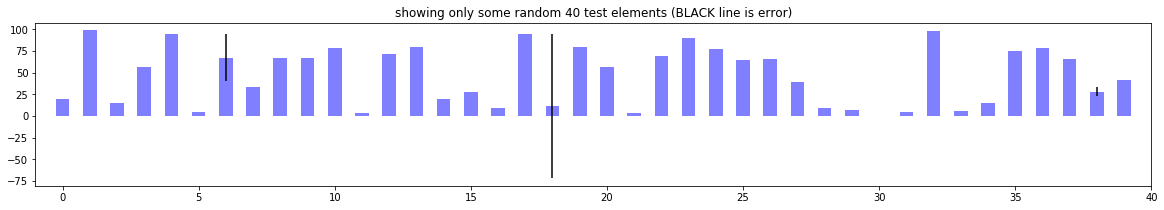

In [142]:
plt.figure(figsize=(20,3))
preds = clf.predict(Xts)
errs  = np.abs(yts - preds)
perm = np.random.permutation(range(len(yts)))[:40]
plt.bar(range(len(perm)), yts[perm], 0.5, yerr = errs[perm], color="blue", alpha=.5)
plt.xlim(-1,len(perm))
plt.title("showing only some random %d test elements (BLACK line is error)"%len(perm))

2 3 4 5 6 7 8 9 10


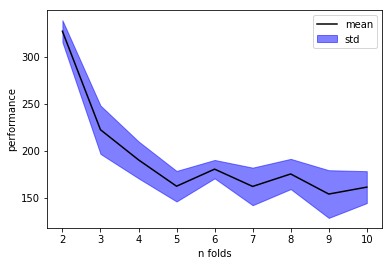

In [143]:
show_curve(ExtraTreesClassifier())

In [144]:
s = cross_val_score(clf, X, y, cv=KFold(4, shuffle=True), scoring=make_scorer(accuracy_score))
print "accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s))

accuracy 0.898 (+/- 0.00268)


## Utilizando PCA 

**Random Forest**


In [148]:
from sklearn.decomposition import PCA
X1 = PCA(n_components=4).fit_transform(X)
s = cross_val_score(RandomForestClassifier(), X1, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print "accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s))

accuracy 0.775 (+/- 0.00749)


In [150]:
s = cross_val_score(ExtraTreesClassifier(), X1, y, cv=KFold(4, shuffle=True), scoring=make_scorer(accuracy_score))
print "accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s))

accuracy 0.793 (+/- 0.00531)
